In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from cartopy import config
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [3]:
model1out = np.load('../model_out/dataset_SCA_coast_model1_FINAL2.npy', allow_pickle=True).item(0)
model1 = model1out['model'].best_estimator_

model2out = np.load('../model_out/dataset_SCA_coast_model2_FINAL2.npy', allow_pickle=True).item(0)
model2 = model2out['model'].best_estimator_

model3out = np.load('../model_out/dataset_SCA_coast_model3_FINAL2.npy', allow_pickle=True).item(0)
model3 = model3out['model'].best_estimator_

model4out = np.load('../model_out/dataset_SCA_coast_model4_FINAL2.npy', allow_pickle=True).item(0)
model4 = model4out['model'].best_estimator_

model5out = np.load('../model_out/dataset_SCA_coast_model5_FINAL2.npy', allow_pickle=True).item(0)
model5 = model5out['model'].best_estimator_

model6out = np.load('../model_out/dataset_SCA_coast_model6_FINAL2.npy', allow_pickle=True).item(0)
model6 = model6out['model'].best_estimator_

model7out = np.load('../model_out/dataset_SCA_coast_model7_FINAL2.npy', allow_pickle=True).item(0)
model7 = model7out['model'].best_estimator_

model8out = np.load('../model_out/dataset_SCA_coast_model8_FINAL2.npy', allow_pickle=True).item(0)
model8 = model8out['model'].best_estimator_

In [4]:
df = pd.read_csv('../model_data/dataset_SEUS_EAus_SCA_strat-by-gs.csv')

rand = np.load('../model_out/SEUS_EOz_SCA_rand.npy', allow_pickle=True)

In [5]:
X = np.stack((df['beach_slope_average'], rand))
ds_est1 = model1.predict(X.T)

X = np.stack((df['mstr'], rand))
ds_est2 = model2.predict(X.T)

X = np.stack((df['beach_slope_average'], df['mstr'], rand))
ds_est3 = model3.predict(X.T)

X = np.stack((df['beach_slope_average'], df['mstr'], df['tp'],   rand))
ds_est4 = model4.predict(X.T)

X = np.stack((df['beach_slope_average'], df['mstr'], df['hs_mean'], rand))
ds_est5 = model5.predict(X.T)

X = np.stack((df['beach_slope_average'], df['mstr'], df['dir'], rand))
ds_est6 = model6.predict(X.T)

X = np.stack((df['mstr'], df['tp'], df['hs_mean'],  rand))
ds_est7 = model7.predict(X.T)

X = np.stack((df['beach_slope_average'], df['mstr'], df['tp'], df['hs_mean'],  rand))
ds_est8 = model8.predict(X.T)

In [6]:
def prc_err(y,yest):
    return 100*(np.abs(y-yest)/y)

Text(1.2, 1.4, 'Mean error: 11%')

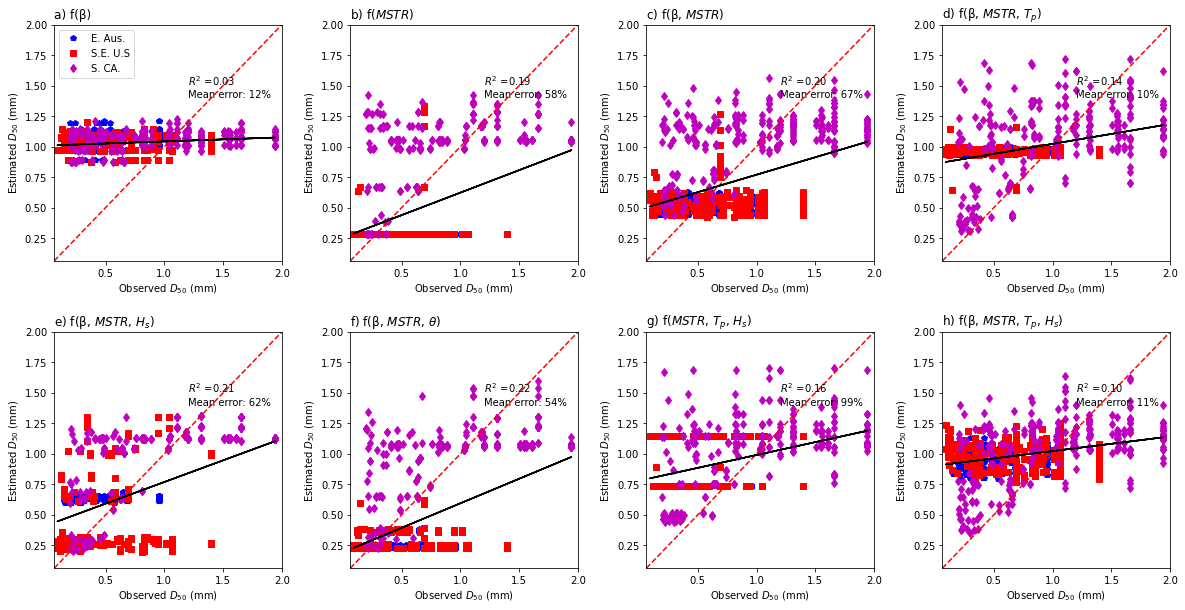

In [7]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

plt.subplot(2,4,1); 
plt.plot(df['d50'][df['code']==0], ds_est1[df['code']==0], 'bp', label='E. Aus.')
plt.plot(df['d50'][df['code']==1], ds_est1[df['code']==1], 'rs', label='S.E. U.S')
plt.plot(df['d50'][df['code']==2], ds_est1[df['code']==2], 'md', label='S. CA.')
plt.legend(loc=0)

plt.xlim(0.063,2.0); plt.ylim(0.063,2.0)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"a) f(β)", loc='left')
r2 = np.min(np.corrcoef(df['d50'], ds_est1))**2
plt.text(1.2,1.5,r'$R^2$ ='+str(r2)[:4])

coef = np.polyfit(df['d50'], ds_est1,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(df['d50'], poly1d_fn(df['d50']), '-k')
plt.text(1.2,1.4, r'Mean error: {}%'.format(str(np.mean(prc_err(df['d50'],ds_est1)))[:2]))


plt.subplot(2,4,2);
plt.plot(df['d50'][df['code']==0], ds_est2[df['code']==0], 'bp', label='E. Aus.')
plt.plot(df['d50'][df['code']==1], ds_est2[df['code']==1], 'rs', label='S.E. U.S')
plt.plot(df['d50'][df['code']==2], ds_est2[df['code']==2], 'md', label='S. CA.')

plt.xlim(0.063,2.0); plt.ylim(0.063,2.0)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"b) f($MSTR$)", loc='left')
r2 = np.min(np.corrcoef(df['d50'], ds_est2))**2
plt.text(1.2,1.5,r'$R^2$ ='+str(r2)[:4])

coef = np.polyfit(df['d50'], ds_est2,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(df['d50'], poly1d_fn(df['d50']), '-k')
plt.text(1.2,1.4, r'Mean error: {}%'.format(str(np.mean(prc_err(df['d50'],ds_est2)))[:2]))


plt.subplot(2,4,3); 
plt.plot(df['d50'][df['code']==0], ds_est3[df['code']==0], 'bp', label='E. Aus.')
plt.plot(df['d50'][df['code']==1], ds_est3[df['code']==1], 'rs', label='S.E. U.S')
plt.plot(df['d50'][df['code']==2], ds_est3[df['code']==2], 'md', label='S. CA.')

plt.xlim(0.063,2.0); plt.ylim(0.063,2.0)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title("c) f(β, $MSTR$)", loc='left')
r2 = np.min(np.corrcoef(df['d50'], ds_est3))**2
plt.text(1.2,1.5,r'$R^2$ ='+str(r2)[:4])

coef = np.polyfit(df['d50'], ds_est3,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(df['d50'], poly1d_fn(df['d50']), '-k')
plt.text(1.2,1.4, r'Mean error: {}%'.format(str(np.mean(prc_err(df['d50'],ds_est3)))[:2]))


plt.subplot(2,4,4); 
plt.plot(df['d50'][df['code']==0], ds_est4[df['code']==0], 'bp', label='E. Aus.')
plt.plot(df['d50'][df['code']==1], ds_est4[df['code']==1], 'rs', label='S.E. U.S')
plt.plot(df['d50'][df['code']==2], ds_est4[df['code']==2], 'md', label='S. CA.')

plt.xlim(0.063,2.0); plt.ylim(0.063,2.0)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"d) f(β, $MSTR$, $T_p$)", loc='left')
r2 = np.min(np.corrcoef(df['d50'], ds_est4))**2
plt.text(1.2,1.5,r'$R^2$ ='+str(r2)[:4])

coef = np.polyfit(df['d50'], ds_est4,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(df['d50'], poly1d_fn(df['d50']), '-k')
plt.text(1.2,1.4, r'Mean error: {}%'.format(str(np.mean(prc_err(df['d50'],ds_est4)))[:2]))


plt.subplot(2,4,5); 
plt.plot(df['d50'][df['code']==0], ds_est5[df['code']==0], 'bp', label='E. Aus.')
plt.plot(df['d50'][df['code']==1], ds_est5[df['code']==1], 'rs', label='S.E. U.S')
plt.plot(df['d50'][df['code']==2], ds_est5[df['code']==2], 'md', label='S. CA.')

plt.xlim(0.063,2.0); plt.ylim(0.063,2.0)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"e) f(β, $MSTR$, $H_s$)", loc='left')
r2 = np.min(np.corrcoef(df['d50'], ds_est5))**2
plt.text(1.2,1.5,r'$R^2$ ='+str(r2)[:4])

coef = np.polyfit(df['d50'], ds_est5,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(df['d50'], poly1d_fn(df['d50']), '-k')
plt.text(1.2,1.4, r'Mean error: {}%'.format(str(np.mean(prc_err(df['d50'],ds_est5)))[:2]))


plt.subplot(2,4,6); 
plt.plot(df['d50'][df['code']==0], ds_est6[df['code']==0], 'bp', label='E. Aus.')
plt.plot(df['d50'][df['code']==1], ds_est6[df['code']==1], 'rs', label='S.E. U.S')
plt.plot(df['d50'][df['code']==2], ds_est6[df['code']==2], 'md', label='S. CA.')

plt.xlim(0.063,2.0); plt.ylim(0.063,2.0)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"f) f(β, $MSTR$, $\theta$)", loc='left')
r2 = np.min(np.corrcoef(df['d50'], ds_est6))**2
plt.text(1.2,1.5,r'$R^2$ ='+str(r2)[:4])

coef = np.polyfit(df['d50'], ds_est6,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(df['d50'], poly1d_fn(df['d50']), '-k')
plt.text(1.2,1.4, r'Mean error: {}%'.format(str(np.mean(prc_err(df['d50'],ds_est6)))[:2]))


plt.subplot(2,4,7); 
plt.plot(df['d50'][df['code']==0], ds_est7[df['code']==0], 'bp', label='E. Aus.')
plt.plot(df['d50'][df['code']==1], ds_est7[df['code']==1], 'rs', label='S.E. U.S')
plt.plot(df['d50'][df['code']==2], ds_est7[df['code']==2], 'md', label='S. CA.')

plt.xlim(0.063,2.0); plt.ylim(0.063,2.0)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"g) f($MSTR$, $T_p$, $H_s$)", loc='left')
r2 = np.min(np.corrcoef(df['d50'], ds_est7))**2
plt.text(1.2,1.5,r'$R^2$ ='+str(r2)[:4])

coef = np.polyfit(df['d50'], ds_est7,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(df['d50'], poly1d_fn(df['d50']), '-k')
plt.text(1.2,1.4, r'Mean error: {}%'.format(str(np.mean(prc_err(df['d50'],ds_est7)))[:2]))


plt.subplot(2,4,8); 
plt.plot(df['d50'][df['code']==0], ds_est8[df['code']==0], 'bp', label='E. Aus.')
plt.plot(df['d50'][df['code']==1], ds_est8[df['code']==1], 'rs', label='S.E. U.S')
plt.plot(df['d50'][df['code']==2], ds_est8[df['code']==2], 'md', label='S. CA.')

plt.xlim(0.063,2.0); plt.ylim(0.063,2.0)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"h) f(β, $MSTR$, $T_p$, $H_s$)", loc='left')
r2 = np.min(np.corrcoef(df['d50'], ds_est8))**2
plt.text(1.2,1.5,r'$R^2$ ='+str(r2)[:4])

coef = np.polyfit(df['d50'], ds_est8,1)
poly1d_fn = np.poly1d(coef) 
plt.plot(df['d50'], poly1d_fn(df['d50']), '-k')
plt.text(1.2,1.4, r'Mean error: {}%'.format(str(np.mean(prc_err(df['d50'],ds_est8)))[:2]))


In [8]:
### apply to Australia regions

In [9]:
dfOzCG = pd.read_csv('../model_data/dataset_Australia_GulfCarpentaria_coast_strat_gs.csv')
dfOzW = pd.read_csv('../model_data/dataset_Australia_W_coast_strat_gs.csv')
dfOzNW = pd.read_csv('../model_data/dataset_Australia_NW_coast_strat_gs.csv')
dfOzNE = pd.read_csv('../model_data/dataset_Australia_NE_coast_strat_gs.csv')
dfOzSE = pd.read_csv('../model_data/dataset_Australia_SE_coast_strat_gs.csv')
dfOzS = pd.read_csv('../model_data/dataset_Australia_S_coast_strat_gs.csv')

In [10]:
# dfOz = pd.read_csv('../model_data/dataset_whole_Aus_coast_strat_gs.csv')

In [11]:
rand = np.random.randn(len(dfOzCG))
X = np.stack((dfOzCG['beach_slope_average'], rand))
ds_est1_CG = model1.predict(X.T)

rand = np.random.randn(len(dfOzW))
X = np.stack((dfOzW['beach_slope_average'], rand))
ds_est1_W = model1.predict(X.T)

rand = np.random.randn(len(dfOzNW))
X = np.stack((dfOzNW['beach_slope_average'],rand))
ds_est1_NW = model1.predict(X.T)

rand = np.random.randn(len(dfOzNE))
X = np.stack((dfOzNE['beach_slope_average'], rand))
ds_est1_NE = model1.predict(X.T)

rand = np.random.randn(len(dfOzSE))
X = np.stack((dfOzSE['beach_slope_average'], rand))
ds_est1_SE = model1.predict(X.T)

rand = np.random.randn(len(dfOzS))
X = np.stack((dfOzS['beach_slope_average'], rand))
ds_est1_S = model1.predict(X.T)

In [12]:
rand = np.random.randn(len(dfOzCG))
X = np.stack(( dfOzCG['mstr'],  rand))
ds_est2_CG = model2.predict(X.T)

rand = np.random.randn(len(dfOzW))
X = np.stack((dfOzW['mstr'], rand))
ds_est2_W = model2.predict(X.T)

rand = np.random.randn(len(dfOzNW))
X = np.stack((dfOzNW['mstr'], rand))
ds_est2_NW = model2.predict(X.T)

rand = np.random.randn(len(dfOzNE))
X = np.stack((dfOzNE['mstr'],  rand))
ds_est2_NE = model2.predict(X.T)

rand = np.random.randn(len(dfOzSE))
X = np.stack((dfOzSE['mstr'], rand))
ds_est2_SE = model2.predict(X.T)

rand = np.random.randn(len(dfOzS))
X = np.stack((dfOzS['mstr'],rand))
ds_est2_S = model2.predict(X.T)

In [13]:
rand = np.random.randn(len(dfOzCG))
X = np.stack((dfOzCG['beach_slope_average'], dfOzCG['mstr'],  rand))
ds_est3_CG = model3.predict(X.T)

rand = np.random.randn(len(dfOzW))
X = np.stack((dfOzW['beach_slope_average'], dfOzW['mstr'],  rand))
ds_est3_W = model3.predict(X.T)

rand = np.random.randn(len(dfOzNW))
X = np.stack((dfOzNW['beach_slope_average'], dfOzNW['mstr'], rand))
ds_est3_NW = model3.predict(X.T)

rand = np.random.randn(len(dfOzNE))
X = np.stack((dfOzNE['beach_slope_average'], dfOzNE['mstr'],  rand))
ds_est3_NE = model3.predict(X.T)

rand = np.random.randn(len(dfOzSE))
X = np.stack((dfOzSE['beach_slope_average'], dfOzSE['mstr'], rand))
ds_est3_SE = model3.predict(X.T)

rand = np.random.randn(len(dfOzS))
X = np.stack((dfOzS['beach_slope_average'], dfOzS['mstr'], rand))
ds_est3_S = model3.predict(X.T)

In [14]:
rand = np.random.randn(len(dfOzCG))
X = np.stack((dfOzCG['beach_slope_average'], dfOzCG['mstr'], dfOzCG['tp'], rand))
ds_est4_CG = model4.predict(X.T)

rand = np.random.randn(len(dfOzW))
X = np.stack((dfOzW['beach_slope_average'], dfOzW['mstr'], dfOzW['tp'], rand))
ds_est4_W = model4.predict(X.T)

rand = np.random.randn(len(dfOzNW))
X = np.stack((dfOzNW['beach_slope_average'], dfOzNW['mstr'], dfOzNW['tp'], rand))
ds_est4_NW = model4.predict(X.T)

rand = np.random.randn(len(dfOzNE))
X = np.stack((dfOzNE['beach_slope_average'], dfOzNE['mstr'], dfOzNE['tp'], rand))
ds_est4_NE = model4.predict(X.T)

rand = np.random.randn(len(dfOzSE))
X = np.stack((dfOzSE['beach_slope_average'], dfOzSE['mstr'], dfOzSE['tp'], rand))
ds_est4_SE = model4.predict(X.T)

rand = np.random.randn(len(dfOzS))
X = np.stack((dfOzS['beach_slope_average'], dfOzS['mstr'], dfOzS['tp'], rand))
ds_est4_S = model4.predict(X.T)

In [15]:
rand = np.random.randn(len(dfOzCG))
X = np.stack((dfOzCG['beach_slope_average'], dfOzCG['mstr'], dfOzCG['hs_mean'], rand))
ds_est5_CG = model5.predict(X.T)

rand = np.random.randn(len(dfOzW))
X = np.stack((dfOzW['beach_slope_average'], dfOzW['mstr'], dfOzW['hs_mean'], rand))
ds_est5_W = model5.predict(X.T)

rand = np.random.randn(len(dfOzNW))
X = np.stack((dfOzNW['beach_slope_average'], dfOzNW['mstr'], dfOzNW['hs_mean'], rand))
ds_est5_NW = model5.predict(X.T)

rand = np.random.randn(len(dfOzNE))
X = np.stack((dfOzNE['beach_slope_average'], dfOzNE['mstr'], dfOzNE['hs_mean'], rand))
ds_est5_NE = model5.predict(X.T)

rand = np.random.randn(len(dfOzSE))
X = np.stack((dfOzSE['beach_slope_average'], dfOzSE['mstr'], dfOzSE['hs_mean'], rand))
ds_est5_SE = model5.predict(X.T)

rand = np.random.randn(len(dfOzS))
X = np.stack((dfOzS['beach_slope_average'], dfOzS['mstr'], dfOzS['hs_mean'], rand))
ds_est5_S = model5.predict(X.T)

In [16]:
rand = np.random.randn(len(dfOzCG))
X = np.stack((dfOzCG['beach_slope_average'], dfOzCG['mstr'], dfOzCG['dir'], rand))
ds_est6_CG = model6.predict(X.T)

rand = np.random.randn(len(dfOzW))
X = np.stack((dfOzW['beach_slope_average'], dfOzW['mstr'], dfOzW['dir'], rand))
ds_est6_W = model6.predict(X.T)

rand = np.random.randn(len(dfOzNW))
X = np.stack((dfOzNW['beach_slope_average'], dfOzNW['mstr'], dfOzNW['dir'], rand))
ds_est6_NW = model6.predict(X.T)

rand = np.random.randn(len(dfOzNE))
X = np.stack((dfOzNE['beach_slope_average'], dfOzNE['mstr'], dfOzNE['dir'], rand))
ds_est6_NE = model6.predict(X.T)

rand = np.random.randn(len(dfOzSE))
X = np.stack((dfOzSE['beach_slope_average'], dfOzSE['mstr'], dfOzSE['dir'], rand))
ds_est6_SE = model6.predict(X.T)

rand = np.random.randn(len(dfOzS))
X = np.stack((dfOzS['beach_slope_average'], dfOzS['mstr'], dfOzS['dir'], rand))
ds_est6_S = model6.predict(X.T)

In [17]:
rand = np.random.randn(len(dfOzCG))
X = np.stack((dfOzCG['mstr'], dfOzCG['tp'], dfOzCG['hs_mean'], rand))
ds_est7_CG = model7.predict(X.T)

rand = np.random.randn(len(dfOzW))
X = np.stack((dfOzW['mstr'], dfOzW['tp'], dfOzW['hs_mean'], rand))
ds_est7_W = model7.predict(X.T)

rand = np.random.randn(len(dfOzNW))
X = np.stack((dfOzNW['mstr'], dfOzNW['tp'], dfOzNW['hs_mean'], rand))
ds_est7_NW = model7.predict(X.T)

rand = np.random.randn(len(dfOzNE))
X = np.stack((dfOzNE['mstr'], dfOzNE['tp'], dfOzNE['hs_mean'], rand))
ds_est7_NE = model7.predict(X.T)

rand = np.random.randn(len(dfOzSE))
X = np.stack((dfOzSE['mstr'], dfOzSE['tp'], dfOzSE['hs_mean'], rand))
ds_est7_SE = model7.predict(X.T)

rand = np.random.randn(len(dfOzS))
X = np.stack((dfOzS['mstr'], dfOzS['tp'], dfOzS['hs_mean'], rand))
ds_est7_S = model7.predict(X.T)

In [18]:
rand = np.random.randn(len(dfOzCG))
X = np.stack((dfOzCG['beach_slope_average'], dfOzCG['mstr'], dfOzCG['tp'], dfOzCG['hs_mean'], rand))
ds_est8_CG = model8.predict(X.T)

rand = np.random.randn(len(dfOzW))
X = np.stack((dfOzW['beach_slope_average'], dfOzW['mstr'], dfOzW['tp'], dfOzW['hs_mean'], rand))
ds_est8_W = model8.predict(X.T)

rand = np.random.randn(len(dfOzNW))
X = np.stack((dfOzNW['beach_slope_average'], dfOzNW['mstr'], dfOzNW['tp'], dfOzNW['hs_mean'], rand))
ds_est8_NW = model8.predict(X.T)

rand = np.random.randn(len(dfOzNE))
X = np.stack((dfOzNE['beach_slope_average'], dfOzNE['mstr'], dfOzNE['tp'], dfOzNE['hs_mean'], rand))
ds_est8_NE = model8.predict(X.T)

rand = np.random.randn(len(dfOzSE))
X = np.stack((dfOzSE['beach_slope_average'], dfOzSE['mstr'], dfOzSE['tp'], dfOzSE['hs_mean'], rand))
ds_est8_SE = model8.predict(X.T)

rand = np.random.randn(len(dfOzS))
X = np.stack((dfOzS['beach_slope_average'], dfOzS['mstr'], dfOzS['tp'], dfOzS['hs_mean'], rand))
ds_est8_S = model8.predict(X.T)

Text(0.0, 1.0, 'h) f(β, $MSTR$, $T_p$, $H_s$)')

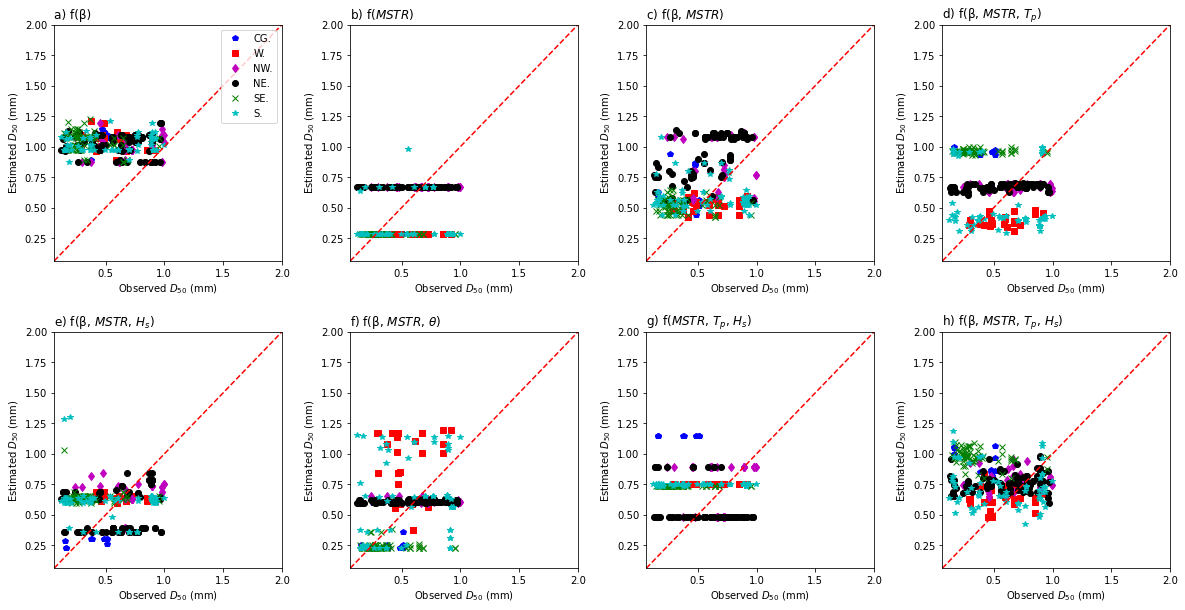

In [19]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

plt.subplot(2,4,1); 
plt.plot(dfOzCG['d50'], ds_est1_CG, 'bp', label='CG.')
plt.plot(dfOzW['d50'], ds_est1_W, 'rs', label='W.')
plt.plot(dfOzNW['d50'], ds_est1_NW, 'md', label='NW.')
plt.plot(dfOzNE['d50'], ds_est1_NE, 'ko', label='NE.')
plt.plot(dfOzSE['d50'], ds_est1_SE, 'gx', label='SE.')
plt.plot(dfOzS['d50'], ds_est1_S, 'c*', label='S.')
plt.legend(loc=1)

plt.xlim(0.063,2.0); plt.ylim(0.063,2.0)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"a) f(β)", loc='left')

plt.subplot(2,4,2); 
plt.plot(dfOzCG['d50'], ds_est2_CG, 'bp', label='CG.')
plt.plot(dfOzW['d50'], ds_est2_W, 'rs', label='W.')
plt.plot(dfOzNW['d50'], ds_est2_NW, 'md', label='NW.')
plt.plot(dfOzNE['d50'], ds_est2_NE, 'ko', label='NE.')
plt.plot(dfOzSE['d50'], ds_est2_SE, 'gx', label='SE.')
plt.plot(dfOzS['d50'], ds_est2_S, 'c*', label='S.')
# plt.legend(loc=0)

plt.xlim(0.063,2.0); plt.ylim(0.063,2.0)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"b) f($MSTR$)", loc='left')

plt.subplot(2,4,3); 
plt.plot(dfOzCG['d50'], ds_est3_CG, 'bp', label='CG.')
plt.plot(dfOzW['d50'], ds_est3_W, 'rs', label='W.')
plt.plot(dfOzNW['d50'], ds_est3_NW, 'md', label='NW.')
plt.plot(dfOzNE['d50'], ds_est3_NE, 'ko', label='NE.')
plt.plot(dfOzSE['d50'], ds_est3_SE, 'gx', label='SE.')
plt.plot(dfOzS['d50'], ds_est3_S, 'c*', label='S.')
# plt.legend(loc=0)

plt.xlim(0.063,2.0); plt.ylim(0.063,2.0)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title("c) f(β, $MSTR$)", loc='left')

plt.subplot(2,4,4); 
plt.plot(dfOzCG['d50'], ds_est4_CG, 'bp', label='CG.')
plt.plot(dfOzW['d50'], ds_est4_W, 'rs', label='W.')
plt.plot(dfOzNW['d50'], ds_est4_NW, 'md', label='NW.')
plt.plot(dfOzNE['d50'], ds_est4_NE, 'ko', label='NE.')
plt.plot(dfOzSE['d50'], ds_est4_SE, 'gx', label='SE.')
plt.plot(dfOzS['d50'], ds_est4_S, 'c*', label='S.')
# plt.legend(loc=0)

plt.xlim(0.063,2.0); plt.ylim(0.063,2.0)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"d) f(β, $MSTR$, $T_p$)", loc='left')

plt.subplot(2,4,5); 
plt.plot(dfOzCG['d50'], ds_est5_CG, 'bp', label='CG.')
plt.plot(dfOzW['d50'], ds_est5_W, 'rs', label='W.')
plt.plot(dfOzNW['d50'], ds_est5_NW, 'md', label='NW.')
plt.plot(dfOzNE['d50'], ds_est5_NE, 'ko', label='NE.')
plt.plot(dfOzSE['d50'], ds_est5_SE, 'gx', label='SE.')
plt.plot(dfOzS['d50'], ds_est5_S, 'c*', label='S.')
# plt.legend(loc=0)

plt.xlim(0.063,2.0); plt.ylim(0.063,2.0)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"e) f(β, $MSTR$, $H_s$)", loc='left')

plt.subplot(2,4,6); 
plt.plot(dfOzCG['d50'], ds_est6_CG, 'bp', label='CG.')
plt.plot(dfOzW['d50'], ds_est6_W, 'rs', label='W.')
plt.plot(dfOzNW['d50'], ds_est6_NW, 'md', label='NW.')
plt.plot(dfOzNE['d50'], ds_est6_NE, 'ko', label='NE.')
plt.plot(dfOzSE['d50'], ds_est6_SE, 'gx', label='SE.')
plt.plot(dfOzS['d50'], ds_est6_S, 'c*', label='S.')
# plt.legend(loc=0)

plt.xlim(0.063,2.0); plt.ylim(0.063,2.0)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"f) f(β, $MSTR$, $\theta$)", loc='left')

plt.subplot(2,4,7); 
plt.plot(dfOzCG['d50'], ds_est7_CG, 'bp', label='CG.')
plt.plot(dfOzW['d50'], ds_est7_W, 'rs', label='W.')
plt.plot(dfOzNW['d50'], ds_est7_NW, 'md', label='NW.')
plt.plot(dfOzNE['d50'], ds_est7_NE, 'ko', label='NE.')
plt.plot(dfOzSE['d50'], ds_est7_SE, 'gx', label='SE.')
plt.plot(dfOzS['d50'], ds_est7_S, 'c*', label='S.')
# plt.legend(loc=0)

plt.xlim(0.063,2.0); plt.ylim(0.063,2.0)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"g) f($MSTR$, $T_p$, $H_s$)", loc='left')

plt.subplot(2,4,8); 
plt.plot(dfOzCG['d50'], ds_est8_CG, 'bp', label='CG.')
plt.plot(dfOzW['d50'], ds_est8_W, 'rs', label='W.')
plt.plot(dfOzNW['d50'], ds_est8_NW, 'md', label='NW.')
plt.plot(dfOzNE['d50'], ds_est8_NE, 'ko', label='NE.')
plt.plot(dfOzSE['d50'], ds_est8_SE, 'gx', label='SE.')
plt.plot(dfOzS['d50'], ds_est8_S, 'c*', label='S.')
# plt.legend(loc=0)

plt.xlim(0.063,2.0); plt.ylim(0.063,2.0)
yl=plt.ylim()
plt.plot(yl,yl,'--r')
plt.xlabel(r'Observed $D_{50}$ (mm)')
plt.ylabel(r'Estimated $D_{50}$ (mm)')
plt.title(r"h) f(β, $MSTR$, $T_p$, $H_s$)", loc='left')

In [20]:
# Create a feature for States/Admin 1 regions at 1:50m from Natural Earth
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='10m',
    facecolor='none')

In [21]:
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '10m',
                                        edgecolor='face',
                                        facecolor=cfeature.COLORS['land'])

rivers_50m = cfeature.NaturalEarthFeature('physical', 'rivers_lake_centerlines', '10m')

In [22]:
ds_est_best = ds_est5.copy()

C:\Users\dbuscombe\Anaconda3\envs\cgrasp\lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\dbuscombe\Anaconda3\envs\cgrasp\lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


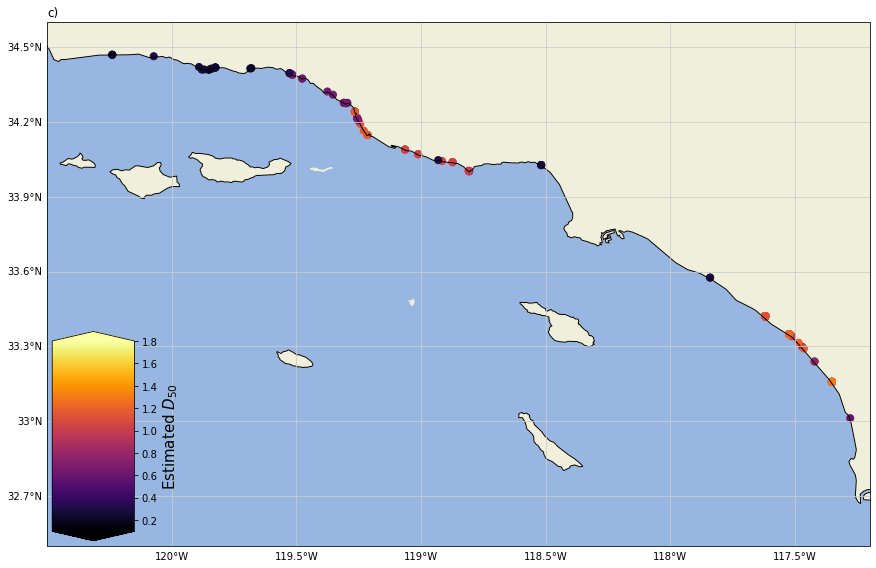

In [23]:
vmin = 0.1
vmax = 1.8
label = r'Estimated $D_{50}$'
title = 'c)'
outfile = '../model_output_plots/SCA_d50-predict-map-best-model.jpg'

crs = ccrs.PlateCarree()
fig=plt.figure(figsize=(16,8))
ax = plt.axes(projection=crs)
ax.set_extent([-117.2, -120.5, 32.5, 34.6], crs=ccrs.PlateCarree())
ax.coastlines(resolution='10m')
ax.set_facecolor(cfeature.COLORS['water'])

ax.add_feature(cfeature.LAND)#, zorder=100)
ax.add_feature(states_provinces, edgecolor='gray', lw=2)#, zorder=100)
ax.add_feature(rivers_50m, facecolor='None', edgecolor='b')#, zorder=100)
gl = ax.gridlines(draw_labels=True, color='.8')

gl.xlabels_top = False
gl.ylabels_right = False
# gl.xlines = False

gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 10, 'color': 'black'}
gl.ylabel_style = {'size': 10, 'color': 'black'}

plt.scatter(df['longitude'],df['latitude'],50,ds_est_best, cmap='inferno', 
            vmin=vmin, vmax=vmax, lw=1,edgecolors=None) #'black')
plt.title(title, loc='left')
# plt.legend(loc=4, fontsize=12)

fig.tight_layout()
cbaxes = inset_axes(ax, width="10%", height="40%", loc=3) 
cb=plt.colorbar(cax=cbaxes,extend='both')#, shrink=0.5)
cb.set_label(label, fontsize=15)

plt.savefig(outfile, dpi=300, bbox_inches='tight')